In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [5]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          13915        369  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1155         33  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59            681         26  1.0              
utkarshx27/monthly-transportation-statis

In [6]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 

100% 610M/612M [00:17<00:00, 31.0MB/s]
100% 612M/612M [00:17<00:00, 37.2MB/s]


In [7]:
!mkdir Dataset
!unzip -q gtsrb-german-traffic-sign.zip -d /content/Dataset

In [25]:
images = []
labels = []
classes = 43

for i in range(classes):
    path = '/content/Dataset/train/'+ str(i)
    raw_images = os.listdir(path)
    for img in raw_images:
        try:
            image = Image.open(path + '/'+ img)
            image = image.resize((50,50))
            image = np.array(image)
            images.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

#converting to numpy array
images = np.array(images)
labels = np.array(labels)

In [26]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing',
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [27]:
print('Shape of Image Data: ' + str(images.shape))
print('Shape of Label Data: ' + str(labels.shape))

Shape of Image Data: (39209, 50, 50, 3)
Shape of Label Data: (39209,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state = 42, shuffle=True)

print("X_train.shape", x_train.shape)
print("X_valid.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)


X_train.shape (29406, 50, 50, 3)
X_valid.shape (9803, 50, 50, 3)
y_train.shape (29406,)
y_valid.shape (9803,)


In [29]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [30]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(8,8), activation='relu', input_shape=(50,50,3)))
model.add(Conv2D(filters=32, kernel_size=(8,8), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))


model.add(Dense(43, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 43, 43, 16)        3088      
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 32)        32800     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 18, 18, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 18, 18, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)       

In [31]:
from tensorflow.keras.optimizers import Adam
opt= Adam(learning_rate=0.001)

In [32]:
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [33]:
epochs = 20
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/20
919/919 [==============================] - 12s 10ms/step - loss: 0.5347 - accuracy: 0.8637 - val_loss: 0.1078 - val_accuracy: 0.9716
Epoch 2/20
919/919 [==============================] - 9s 10ms/step - loss: 0.1385 - accuracy: 0.9623 - val_loss: 0.0910 - val_accuracy: 0.9766
Epoch 3/20
919/919 [==============================] - 9s 10ms/step - loss: 0.0937 - accuracy: 0.9743 - val_loss: 0.0631 - val_accuracy: 0.9863
Epoch 4/20
919/919 [==============================] - 9s 9ms/step - loss: 0.0775 - accuracy: 0.9798 - val_loss: 0.0859 - val_accuracy: 0.9824
Epoch 5/20
919/919 [==============================] - 9s 10ms/step - loss: 0.0778 - accuracy: 0.9811 - val_loss: 0.1689 - val_accuracy: 0.9647
Epoch 6/20
919/919 [==============================] - 9s 10ms/step - loss: 0.0567 - accuracy: 0.9858 - val_loss: 0.0654 - val_accuracy: 0.9874
Epoch 7/20
919/919 [==============================] - 9s 10ms/step - loss: 0.0541 - accuracy: 0.9857 - val_loss: 0.0451 - val_accuracy: 0.9919

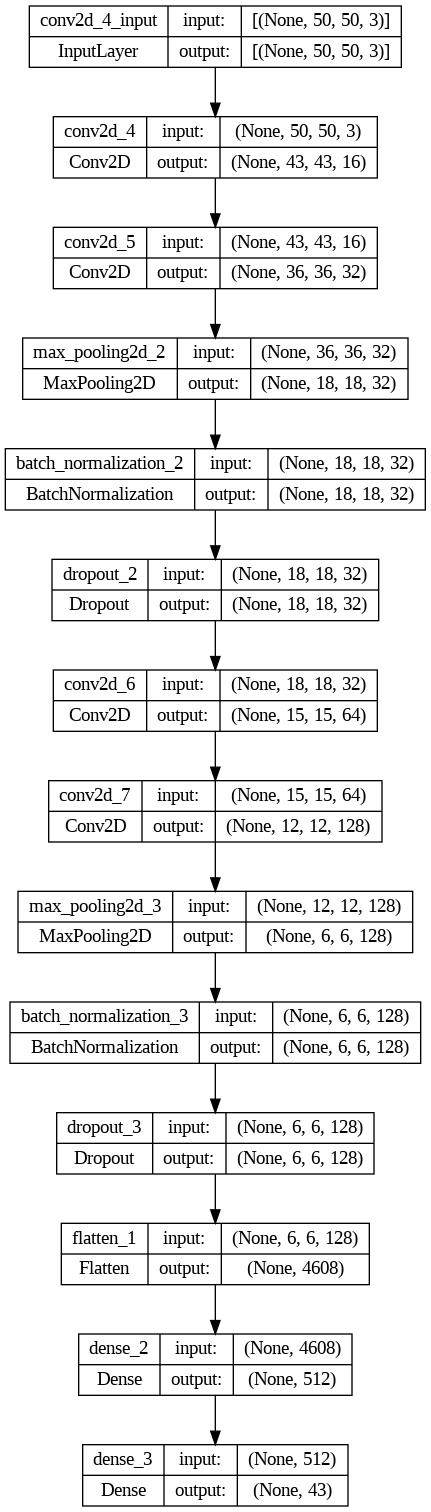

In [46]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

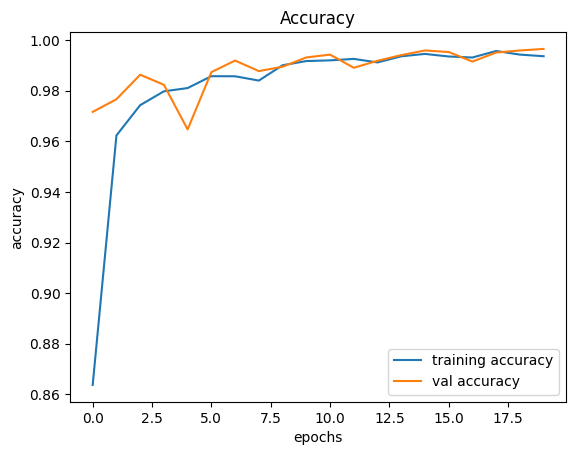

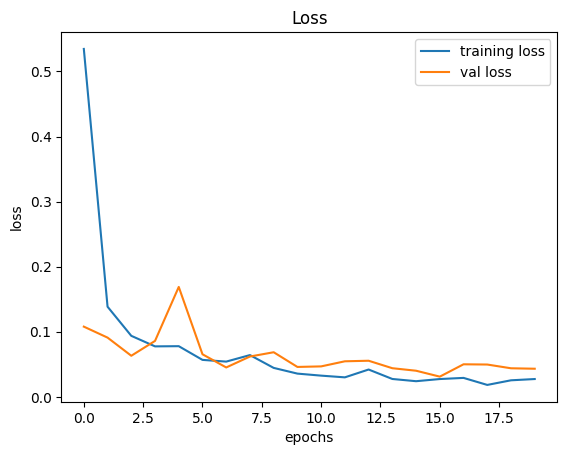

In [34]:
#Accuracy and Loss

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Testing

In [35]:
y_test = pd.read_csv('/content/Dataset/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)

In [36]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')

395/395 [==============================] - 1s 3ms/step
Accuracy: 97.33174980205858 %


#Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm = np.loadtxt("confusion_matrix.csv", delimiter=",")

      0      1      2      3      4      5      6      7      8      9   ...  \
0   60.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0  715.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    3.0  744.0    2.0    0.0    1.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0  435.0    0.0   11.0    0.0    2.0    0.0    0.0  ...   
4    0.0    6.0    0.0    0.0  646.0    0.0    0.0    6.0    0.0    0.0  ...   
5    0.0    3.0    4.0    7.0    1.0  613.0    0.0    2.0    0.0    0.0  ...   
6    0.0    0.0    0.0    0.0    0.0    0.0  130.0    0.0    0.0    0.0  ...   
7    0.0    1.0    0.0    0.0    0.0    3.0    0.0  445.0    1.0    0.0  ...   
8    0.0    7.0    0.0    0.0    0.0    0.0    0.0    0.0  432.0    2.0  ...   
9    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  480.0  ...   
10   0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0  ...   
11   0.0    0.0    0.0    0.0    0.0    

<Axes: >

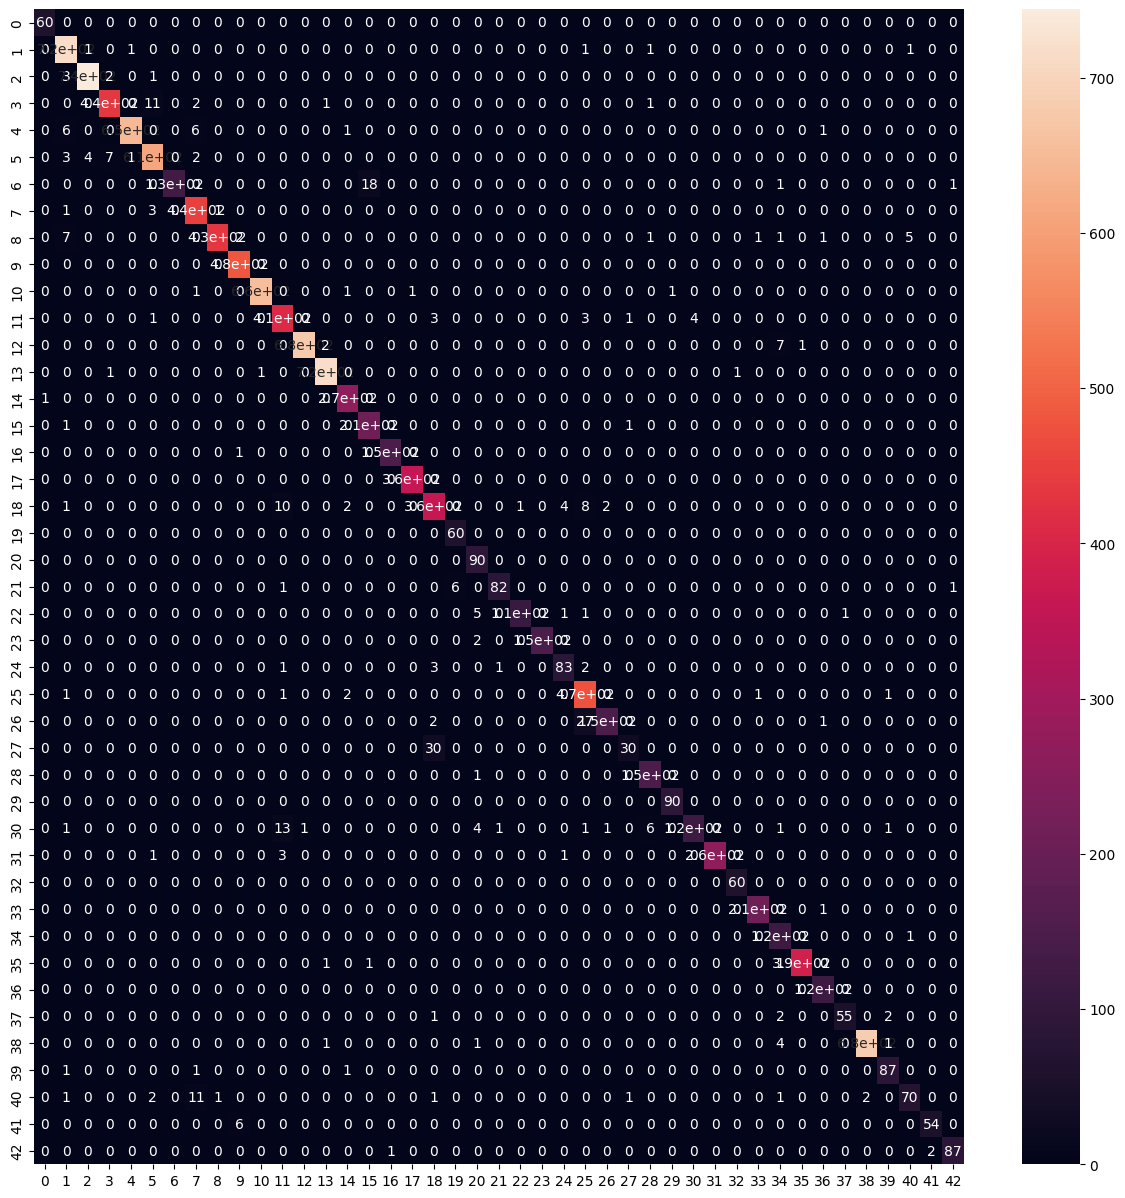

In [39]:
import seaborn as sns
df= pd.DataFrame(cm, index = classes,  columns = classes)
print(df)
plt.figure(figsize = (15,15))
sns.heatmap(df, annot=True)

In [40]:
model.save("./trained/Dlpproj.h5")

In [41]:
from keras.models import load_model
model = load_model('./trained/Dlpproj.h5')

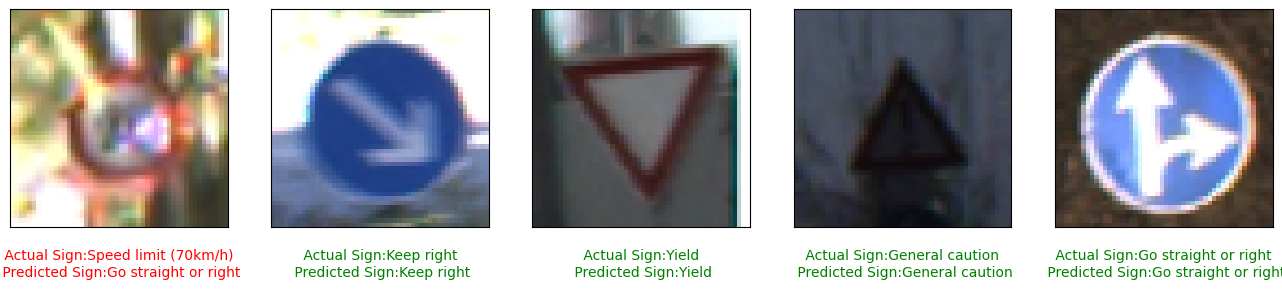

In [42]:
import random
plt.figure(figsize = (50, 50))

start_index = random.randint(0, 12360)
for i in range(5):
    start_index = random.randint(0, 12360)

    plt.subplot(10,15, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('\n Actual Sign:{} \n Predicted Sign:{}'.format(classes[actual],classes[prediction]), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

#INPUT IMAGE TO CLASSIFY


Saving Screenshot 2023-05-14 133408.png to Screenshot 2023-05-14 133408.png
1/1 [==============================] - 1s 688ms/step


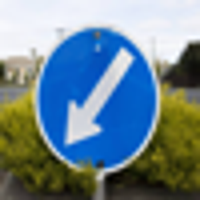

[39]
Sign=Keep left


In [43]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def classify_image():
    uploaded = files.upload()
    data = []
    for filename in uploaded.keys():
        image = Image.open(filename)
        
        image=rgb_image = image.convert("RGB")
        image = image.resize((50,50))
        
        data.append(np.array(image))
    
    x_test = np.array(data)
    y_pred = np.argmax(model.predict(x_test), axis=-1)

    return image, y_pred

pic, res = classify_image()
pic = ImageOps.scale(pic, 4)  
pic.show()
print(res)
print("Sign={}".format(classes[res.item()]))



In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=b1161dc4d73549a170b3dafc857cde1aa652577769ca6050631879558dc8b321
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token('2PmWQPHwg91t57bjOvrobJxRRT3_4PDUhniWt3ekdcN6g3iop')

In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [5]:
import gradio as gr
from PIL import Image, ImageOps
import numpy as np

classes = {0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing',
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons'}

model = load_model('/content/Dlpproj.h5')

def classify_image(image):
    image = Image.fromarray(image.astype('uint8'), 'RGB')
    
    image = ImageOps.scale(image, 4)  
    image = image.convert("RGB")
    image = image.resize((50,50))
    image_array = np.array(image)
    image_array = np.expand_dims(image_array, axis=0)

    y_pred = model.predict(image_array)
    y_pred = np.argmax(y_pred, axis=-1)
    
    return classes[y_pred.item()]

inputs = gr.inputs.Image(label="Input Image")
outputs = gr.outputs.Label(label="Predicted Sign")
title = "Traffic Sign Classifier"
description = "Upload an image of a traffic sign "
theme = "default"
iface = gr.Interface(fn=classify_image, inputs=inputs, outputs=outputs, title=title, description=description, theme=theme)
iface.launch(debug=True,share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://23af25ae870e3fbedb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 20ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://23af25ae870e3fbedb.gradio.live
